In [1]:
import numpy as np
import matplotlib.pyplot as p

In [25]:
N = 1000
x = np.linspace(0,20*np.pi,N)
signal1 = np.sin(x)
signal2 = 0.5*np.sin(10*x)
noise = 2*(np.random.random_sample(N)-0.5)
signal = signal1 + signal2
signal += noise

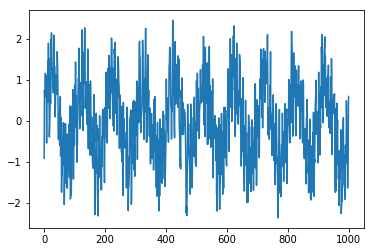

In [26]:
p.plot(signal)

In [40]:
def dft(v):
    N = len(v)
    n_mat, k_mat = np.meshgrid(np.arange(N),np.arange(N))
    exp_mat = np.zeros((N,N),dtype="complex_")
    np.exp(-1j*2*np.pi/N*n_mat*k_mat, out=exp_mat)
    vt = np.matmul(exp_mat,v)
    return vt
vt = dft(signal)

def dft_lm(v):
    #low(er) memory dft
    N = len(v)
    vt = np.zeros(N,dtype="complex_")
    for n in np.arange(N):
        for k in np.arange(N):
            vt[k] += np.exp(-1j*2*np.pi/N*n*k)*v[n]
    return vt
#vt_lm = dft_lm(signal)

def idft(v):
    N = len(v)
    n_mat, k_mat = np.meshgrid(np.arange(N),np.arange(N))
    exp_mat = 1/N*np.exp(1j*2*np.pi/N*n_mat*k_mat)
    vt = np.matmul(exp_mat,v)
    return vt
vtt = idft(vt)

vt_fft = np.fft.fft(signal)

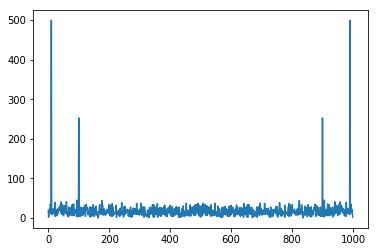

In [36]:
p.plot(np.abs(vt))

In [28]:
%%timeit
vt_lm = dft_lm(signal)

4.56 s ± 67.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%%timeit
vt = dft(signal)

93.5 ms ± 759 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
%%timeit
vt_fft = np.fft.fft(signal)

25.3 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


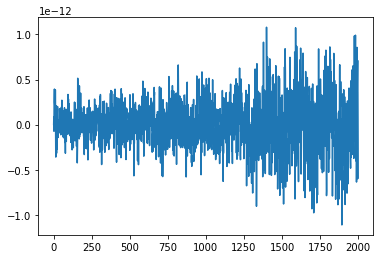

In [6]:
p.plot(np.real(vtt-signal))